# Gaussian Naive Bayes

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

The aim is to construct a classifier that predicts whether a user will buy a new SUV given information of his/her Age and Salary.


In [2]:

dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [3]:
type(X)

numpy.ndarray

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [5]:
X_train

array([[    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000],
       [    53, 104000],
       [    39,  42000],
       [    38,  61000],
       [    36,  50000],
       [    36,  63000],
       [    35,  25000],
       [    35,  50000],
       [    42,  73000],
       [    47,  49000],
       [    59,  29000],
       [    49,  65000],
       [    45, 131000],
       [    31,  89000],
       [    46,  82000],
       [    47,  51000],
       [    26,  15000],
       [    60, 102000],
       [    38, 112000],
       [    40, 107000],
       [    42,  53000],
       [    35,  59000],
       [    48,  41000],
       [    48, 134000],
       [    38, 113000],
       [    29, 148000],
       [    26,  15000],
       [    60,  42000],
       [    24,  19000],
       [    42, 149000],
       [    46,  96000],
       [    28,  59000],
       [    39,  96000],
       [    28,  89000],
       [    41,  72000],
       [    45,  26000],


## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/david/entorno1/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/david/entorno1/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/david/entorno1/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

## Predicting the Test set results

In [10]:
y_pred = classifier.predict(X_test)


## Making the Confusion Matrix

In [11]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 7 25]]


## Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


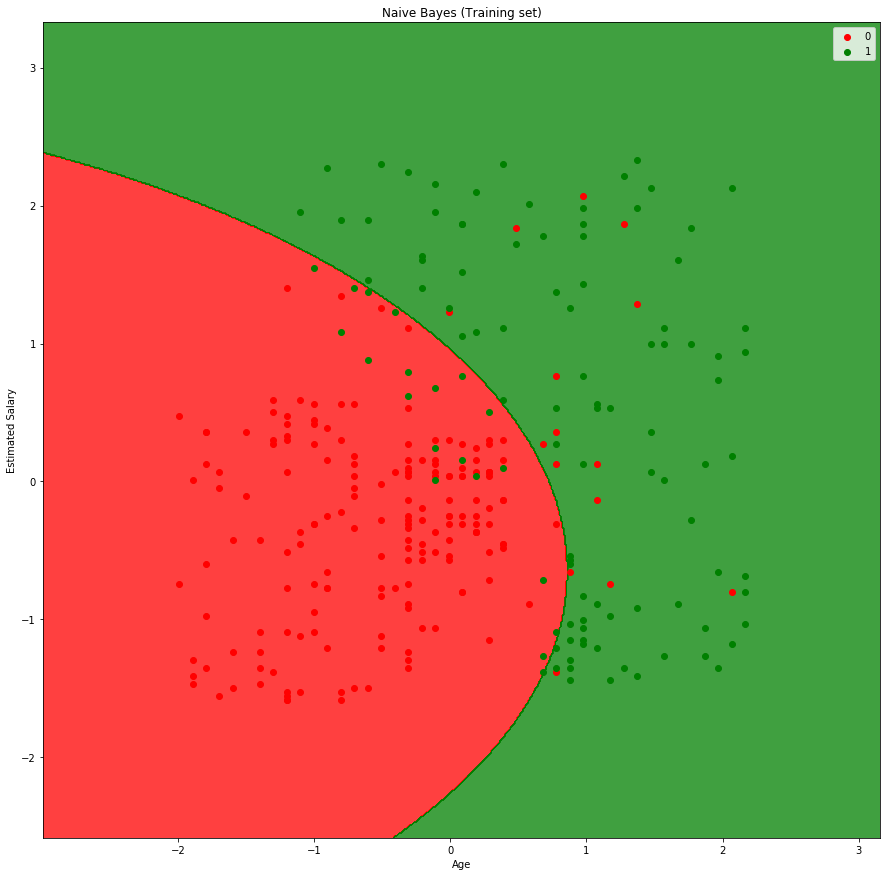

In [12]:
# larger graph 
width = 15
height = 15
plt.figure(figsize=(width, height))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


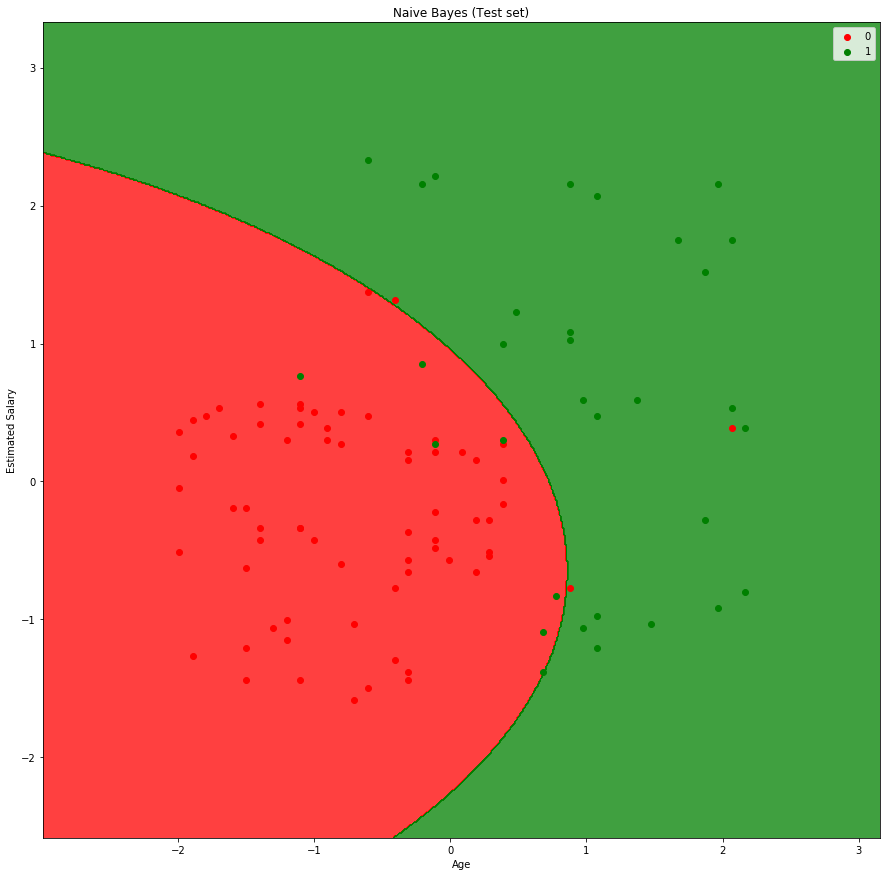

In [13]:
# larger graph 
width = 15
height = 15
plt.figure(figsize=(width, height))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Excercise: Try your own Gaussian Naive Bayes algorithm 

- Hint: compute the mean and standard deviation for each class value and variable|class

- Use a Gaussian function to estimate the probability of a specific attribute value. To do so, you can use the mean and standard deviation computed for that attribute from the training data.

- You should obtain the same confusion matrix of sklearn algorithm


Para facilitar los calculos trabajo con Dataframes.

In [14]:
# Paso 1: Creo el dataframe del conjunto de entrenamiento escalado
scaled_df = pd.DataFrame(X_train, columns=['age','salary'])
scaled_df['label'] = pd.Series(y_train,index=scaled_df.index)
train_dataset= scaled_df.head(X_train.shape[0])
train_dataset

,age,salary,label
0,0.581649,-0.886707,0
1,-0.606738,1.461738,1
2,-0.012544,-0.567782,0
3,-0.606738,1.896635,1
4,1.373907,-1.408584,1
5,1.472940,0.997847,1
6,0.086488,-0.799728,0
7,-0.012544,-0.248858,0
8,-0.210609,-0.567782,0
9,-0.210609,-0.190872,0


In [15]:
# Paso 2: Calculo de los promedios para las caracteristicas (las probabilidades p(y))
#numero de ejemplos con clase '0'
n_clase1 = train_dataset['label'][train_dataset['label']==0].count()
#numero de ejemplos con clase '1'
n_clase2 = train_dataset['label'][train_dataset['label']==1].count()
#numero de ejemplos del dataset
total = train_dataset['label'].count()
#promedios
p_clase0 = n_clase1/total
p_clase1 = n_clase2/total
p_clase0, p_clase1

(0.63, 0.37)

In [17]:
#Paso 3: Calculo los promedios de las combinaciones caracteristica|clases
data_means = train_dataset.groupby('label').mean()
data_means

,age,salary
label,,
0,-0.457403,-0.272635
1,0.778822,0.464217


In [18]:
#Paso 4: Calculo las varianzas  de cada caracteristica
data_varianza = train_dataset.groupby('label').var()
data_varianza

,age,salary
label,,
0,0.603741,0.509655
1,0.723874,1.511057


Por el teorema de Bayes tenemos las siguientes formulas:

$$p(Y_j|x_i) = \frac{p(x_i|Y_j)*p(Y_j)}{p(Y_j)}$$
$$p(x_i|Y_j) = \frac{1}{\sqrt{2\pi \sigma^2_{j,i}}}\epsilon^{-\frac{(x_i-\mu_{j,i})^2}{2\sigma^2_{j,i}}}$$

In [19]:
#Paso5: Calculo de las variables necesarias por cada caracteristica.
#medias de la clase '0'
class0_edad_mean = data_means['age'].values[0]
class0_salary_mean = data_means['salary'].values[0]

#medias de la clase '1'
class1_edad_mean = data_means['age'].values[1]
class1_salary_mean = data_means['salary'].values[1]

#varianza de la clase '0'
class0_edad_variance = data_varianza['age'].values[0]
class0_salary_variance = data_varianza['salary'].values[0]

#medias de la clase '1'
class1_edad_variance = data_varianza['age'].values[1]
class1_salary_variance = data_varianza['salary'].values[1]

print('class0_edad_mean:',class0_edad_mean)
print('class0_salary_mean:',class0_salary_mean)
print('class1_edad_mean:',class1_edad_mean)
print('class1_salary_mean:',class1_salary_mean)
print('class0_edad_variance:',class0_edad_variance)
print('class0_salary_variance:',class0_salary_variance)
print('class1_edad_variance:',class1_edad_variance)
print('class1_salary_variance:',class1_salary_variance)

class0_edad_mean: -0.45740325684887
class0_salary_mean: -0.27263526623273193
class1_edad_mean: 0.7788217616615897
class1_salary_mean: 0.4642168046665438
class0_edad_variance: 0.6037405744698591
class0_salary_variance: 0.5096549283815708
class1_edad_variance: 0.7238735355730073
class1_salary_variance: 1.5110573802297598


In [20]:
#Paso 5: Defino la funcion de densidad de Gauss para datos continuos P(xi|Yj)
def p_x_given_y(x, mean, variance):
    p = (1/(np.sqrt(2*np.pi*variance)))*np.exp((-np.power(x-mean,2))/(2*variance))
    return p

In [21]:
#Paso 6: Defino la funcion de prediccion
def gb_predict(X_test):
    y_pred = []
    for i in range(X_test.shape[0]):
        xx = X_test[i,:]
        p0 = p_clase0*p_x_given_y(xx[0],class0_edad_mean,class0_edad_variance)*p_x_given_y(xx[1],class0_salary_mean,class0_salary_variance)
        p1 = p_clase1*p_x_given_y(xx[0],class1_edad_mean,class1_edad_variance)*p_x_given_y(xx[1],class1_salary_mean,class1_salary_variance)

        if p0>=p1:
            y_pred.append(0)
        else:
            y_pred.append(1)
    return y_pred

In [22]:
#Paso 7: Realizo la prediccion usando el conjunto de pruebas y calculo la matriz de confusion

y_pred2 = np.array(gb_predict(X_test))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
print(cm)

[[65  3]
 [ 7 25]]


La matrix de confusion que se obtuvo es la misma como pide el ejercicio. A continuacion se muestra la grafica de la clasificacion con el modelo implementado.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


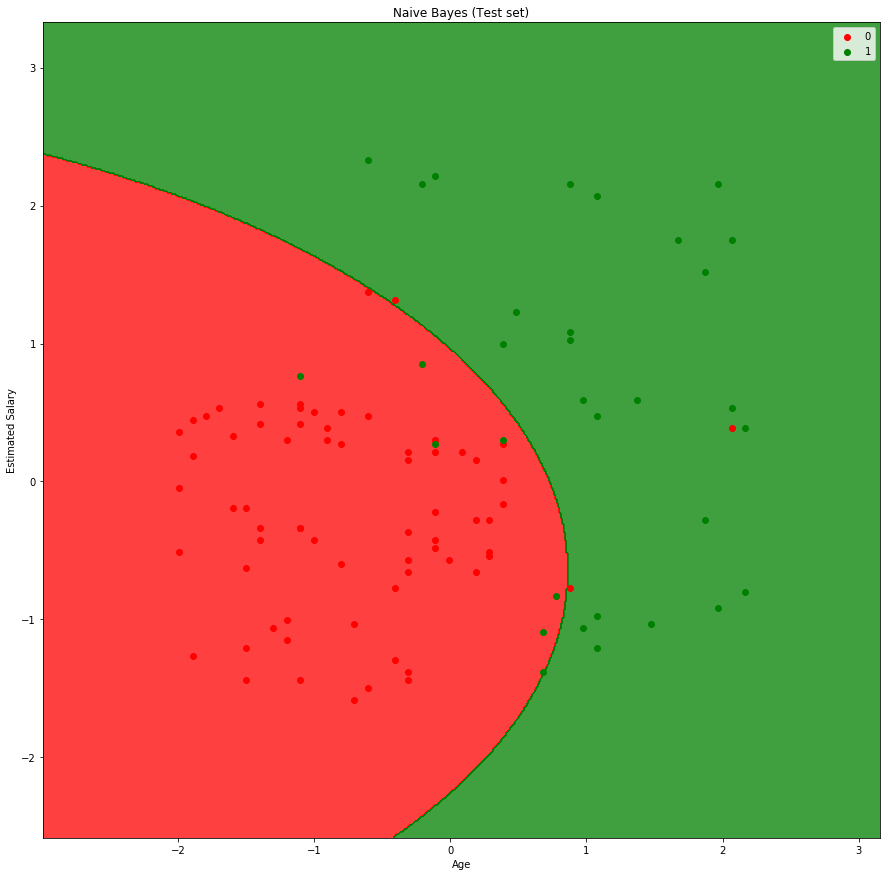

In [29]:
# larger graph 
width = 15
height = 15
plt.figure(figsize=(width, height))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, np.array(gb_predict(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()